<a href="https://colab.research.google.com/github/innovateDotAI/outlier_system/blob/main/Feature_enrichment_analysis_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For details on SVM algorithm please reffer to [Support Vector Machines for Machine Learning](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)

Additoonal refrencees used:
[One-Class Classification Algorithms for Imbalanced Datasets](https://machinelearningmastery.com/one-class-classification-algorithms/)

# 1. Load the Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)
# Set of libraries
# Test save for new version

# 2. Load the data and One Hot Encoding

In [2]:
def rawDataload_TWF():
# Load data from UCI and retrun TS as pandas and list of indexes where failure happends in mfList
  #Data loading and keeping one type of failure
  #First download and import the dataset using pandas:
  import pandas as pd
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
  #column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                  #'Acceleration', 'Model Year', 'Origin']
  col_name = ['UID','PID','Type','airTemp','processTemp','rotationalSpeed','torque','toolwear','machineFailure','TWF','HDF','PWF','OSF','RNF']
  raw_dataset = pd.read_csv(url, names=col_name,
                            na_values='?', comment='\t',
                            sep=',', skipinitialspace=True,header=0)
  #Drop those rows which will not be part of feature vector:
  rawData = raw_dataset.copy()
  #rawData.drop(['UID','PID','TWF','HDF','PWF','OSF','RNF'], axis = 1, inplace = True)
  rawData.drop(['UID','PID','machineFailure','HDF','OSF','PWF','RNF'], axis = 1, inplace = True)
  rawData.rename(columns={'TWF': 'machineFailure'},inplace=True, errors='raise')
  # mark inliers 1, outliers -1
  #rawSVMdata = rawData.copy()
  # rawData['machineFailure' == '1'] = -1
  # rawData['machineFailure' == '0'] = 1
  # rawData
  rawData.loc[rawData["machineFailure"] == 1, "machineFailure"] = -1
  rawData.loc[rawData["machineFailure"] == 0, "machineFailure"] = 1
  # One Hot Encoding of category datatype
  #raw_dataset
  # # generate binary values using get_dummies
  raw_dataset_oneHot = pd.get_dummies(rawData, columns=["Type"], prefix=["Type_is"] )
  rawTS = raw_dataset_oneHot.copy()
  mfList = rawTS.index[rawTS['machineFailure'] == -1].tolist()
  return rawTS,mfList

In [3]:
def rawDataload_HDF():
# Load data from UCI and retrun TS as pandas and list of indexes where failure happends in mfList
  #Data loading and keeping one type of failure
  #First download and import the dataset using pandas:
  import pandas as pd
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
  #column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                  #'Acceleration', 'Model Year', 'Origin']
  col_name = ['UID','PID','Type','airTemp','processTemp','rotationalSpeed','torque','toolwear','machineFailure','TWF','HDF','PWF','OSF','RNF']
  raw_dataset = pd.read_csv(url, names=col_name,
                            na_values='?', comment='\t',
                            sep=',', skipinitialspace=True,header=0)
  #Drop those rows which will not be part of feature vector:
  rawData = raw_dataset.copy()
  #rawData.drop(['UID','PID','TWF','HDF','PWF','OSF','RNF'], axis = 1, inplace = True)
  rawData.drop(['UID','PID','machineFailure','TWF','OSF','PWF','RNF','rotationalSpeed','torque','toolwear','Type'], axis = 1, inplace = True)
  rawData.rename(columns={'HDF': 'machineFailure'},inplace=True, errors='raise')
  # mark inliers 1, outliers -1
  #rawSVMdata = rawData.copy()
  # rawData['machineFailure' == '1'] = -1
  # rawData['machineFailure' == '0'] = 1
  # rawData
  rawData.loc[rawData["machineFailure"] == 1, "machineFailure"] = -1
  rawData.loc[rawData["machineFailure"] == 0, "machineFailure"] = 1
  # One Hot Encoding of category datatype
  #raw_dataset
  # # # generate binary values using get_dummies
  # raw_dataset_oneHot = pd.get_dummies(rawData, columns=["Type"], prefix=["Type_is"] )
  rawTS = rawData.copy()
  mfList = rawTS.index[rawTS['machineFailure'] == -1].tolist()
  return rawTS,mfList

No missing value found

# Check Maximum possible windows size

In [4]:
def maxPossibleWin(mfList):
  key =1
  for w in range(2,100,2):
    b1 = w
    len(mfList)
    for i in range(len(mfList)):
      i=i+1
      try:
        diff = mfList[i] - mfList[i-1]
        if diff < b1:
          key = -1
          #print("Index values: ", mfList[i] , mfList[i-1])
          #print(False)
          break
      except:
        pass
    if key == -1:
      #print("max possible window size:",w-2)
      return w-2

# Train and Test data creation Function Module

In [5]:
def TrainTestData(b1,rawTS,mfList):
  raw_np = rawTS.values
  #print("Input shape of rawTS:",raw_np.shape)
  #print("Input mfList values:",mfList)
  X_test = np.empty((0,raw_np.shape[1]), np.float32)
  # Training dataset creation based on windows size
  # initialize outlier data:
  for i in mfList:
    X_test = np.append(X_test, raw_np[i-b1+1:i+1], axis=0)
  #print(X_test.shape)
  X_train = np.copy(raw_np)
  indexList = []
  for i in mfList:
    #print("Index value i:",i)
    tmp = [i for i in range(i-b1+1,i+1)]
    X= [indexList.append(j) for j in tmp]
  
  #print("Index List:",indexList)
  X_train = np.delete(X_train, indexList, axis=0)
  #print("Shape of X_train after deletion:",X_train.shape)
  #Split features from labels
  #The pop() method removes the specified column from the DataFrame. The pop() method returns the removed columns as a Pandas Series object.
  Y_train = np.copy(X_train)
  Y_test = np.copy(X_test)
  XPopIndex = [5] # Lable value which needs to remove from matrix to generate feature 
  YPopIndex = [0,1,2,3,4,6,7,8] # All featrues index value which needs to be removed.
  X_train = np.delete(X_train, XPopIndex, axis=1)
  X_test = np.delete(X_test, XPopIndex, axis=1)
  Y_train = np.delete(Y_train, YPopIndex, axis=1) # Removing label from Traning_set data
  Y_test = np.delete(Y_test, YPopIndex, axis=1)
  return X_train ,Y_train, X_test,Y_test

In [6]:
def TrainTestData_HDF(b1,rawTS,mfList):
  raw_np = rawTS.values
  #print("Input shape of rawTS:",raw_np.shape)
  #print("Input mfList values:",mfList)
  X_test = np.empty((0,raw_np.shape[1]), np.float32)
  # Training dataset creation based on windows size
  # initialize outlier data:
  for i in mfList:
    X_test = np.append(X_test, raw_np[i-b1+1:i+1], axis=0)
  #print(X_test.shape)
  X_train = np.copy(raw_np)
  indexList = []
  for i in mfList:
    #print("Index value i:",i)
    tmp = [i for i in range(i-b1+1,i+1)]
    X= [indexList.append(j) for j in tmp]
  
  #print("Index List:",indexList)
  X_train = np.delete(X_train, indexList, axis=0)
  #print("Shape of X_train after deletion:",X_train.shape)
  #Split features from labels
  #The pop() method removes the specified column from the DataFrame. The pop() method returns the removed columns as a Pandas Series object.
  Y_train = np.copy(X_train)
  Y_test = np.copy(X_test)
  XPopIndex = [0] # Lable value which needs to remove from matrix to generate feature 
  YPopIndex = [1] # All featrues index value which needs to be removed.
  X_train = np.delete(X_train, XPopIndex, axis=1)
  X_test = np.delete(X_test, XPopIndex, axis=1)
  Y_train = np.delete(Y_train, YPopIndex, axis=1) # Removing label from Traning_set data
  Y_test = np.delete(Y_test, YPopIndex, axis=1)
  return X_train ,Y_train, X_test,Y_test

# Feature Enrichment Function Module

In [7]:
### Function module development for feature entrichment
import numpy as np
def TS_window(b,n,TS_C):
  # Function Module to convet TS into Sliding wondows based TS
  # b = window size
  #n = number of features in given TS data
  # TS_C = Normalized TS data

  i = 0
  TS_G = np.empty((0,b,n), np.float32)  
  for w in range(0,len(TS_C),int(b/2)):
    #count+=1
    #print("windows")  
    win = np.empty((0,n), np.float32)
    for i in range(b):
      try:
      #print("feature vector",w+i,"Values are:",X_train_scaled[w+i])
        win = np.append(win, np.array([TS_C[w+i]]), axis=0)
      except:
        continue
    if win.shape[0] == b:
      TS_G = np.append(TS_G, np.array([win]), axis=0)
  return TS_G
def nor_don(TS_G):
  #Stage 2: Convert TS_G into GNOR
  GNOR = np.empty((0,n), np.float32)
  for ti in TS_G:
    #print(ti.shape)
    nor = np.sqrt(np.sum(np.square(ti), axis=0))
    GNOR = np.append(GNOR, np.array([nor]), axis=0)
  #print("GNOR Shape:",GNOR.shape)
  ## Stage2: Convert TS_G into GDON
  GDON = np.empty((0,n), np.float32)
  for di in range(len(GNOR)):
    if int(GDON.shape[0]) != 0:
      don = GNOR[di]-GNOR[di-1]
      GDON = np.append(GDON, np.array([don]), axis=0)
    else:
      #GDON = np.array([[0,0,0,0,0,0,0,0]])
      GDON = np.array([np.zeros(n)])
  return GNOR , GDON
# Function Module to convert NOR and DON metrices to e-statistics of 8 rows
def estates(n,TS_2):
  b =8 # no. of rows for each e-states
  ts_estate = np.empty((0,b,n), np.float32)
  for h in TS_2:
    win_h = np.empty((0,n), np.float32)
    #mean = np.mean(h,axis = 0)
    win_h = np.append(win_h, np.array([np.mean(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.amin(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.amax(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.quantile(h,0.25,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.quantile(h,0.50,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.quantile(h,0.75,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.ptp(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.std(h,axis = 0)]), axis=0)
    ts_estate = np.append(ts_estate, np.array([win_h]), axis=0)
  return ts_estate
def merge_don_nor(b,HNOR,HDON):
  # Mearger of NOR and DON e-statistics to one matrix
  #b =16 # no. of rows for mearged e-states (NOR+DON estates)
  n = HNOR.shape[2] # Number of features
  TS_H = np.empty((0,b,n), np.float32)
  for m in range(len(HNOR)):
    h_tmp = np.empty((0,n), np.float32)
    for hi in HNOR[m]:
      h_tmp = np.append(h_tmp, np.array([hi]), axis=0)
    for hd in HDON[m]:
      h_tmp = np.append(h_tmp, np.array([hd]), axis=0)
    #h_tmp = np.append(h_tmp, np.array([HDON[m]]), axis=0)
    TS_H = np.append(TS_H, np.array([h_tmp]), axis=0)
  return TS_H

def main_fm(b1,b2,b3,n,TS_C):
  # b1 is 1st stage window size
  #b2 is 3rd stage window size
  #b3 is no. of estate rows for NOR and DON
  #n = number of features in input TimeSeries
  #TS_C is normalized raw time series 
  # Stage-1
  TS_G = TS_window(b1,n,TS_C)
  #print("stage1 sucness")
  # Stage-2
  GNOR , GDON = nor_don(TS_G)
  #print("stage2 sucness")
  # Sliding window formation for 3rd Stage for GNOR
  b2 = 4 # Windows size
  n = GNOR.shape[1] # Number of features
  HGNOR = TS_window(b2,n,GNOR)
  # Sliding window formation for 3rd Stage for GDON
  n = GDON.shape[1] # Number of features
  HGDON = TS_window(b2,n,GDON)
  # Stage-3: Convert HNOR to e-state matrix
  n = HGNOR.shape[2]
  HNOR = estates(n,HGNOR)
  # Convert HDON to e-state matrix
  n = HGDON.shape[2]
  HDON = estates(n,HGDON)
  #print("stage3 sucness")
  TS_H = merge_don_nor(b3,HNOR,HDON)
  return TS_H


# Model accuracy and Loss ploting function module

In [8]:
def plt_model_accuracy(history):
  # Plot the graphs
  import matplotlib.pyplot as plt
  # Increase size of plot in jupyter

  plt.rcParams["figure.figsize"] = (16,5.5)  
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  acc = list(history.history.keys())[1]
  val_acc = list(history_2dcnnae.history.keys())[3]
  loss = list(history_2dcnnae.history.keys())[0]
  val_loss = list(history_2dcnnae.history.keys())[2]
  plt.plot(history.history[acc])
  plt.plot(history.history[val_acc])
  plt.title('recreation accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history[loss])
  plt.plot(history.history[val_loss])
  plt.title('recreation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Data normalization(Z-score) FM

In [9]:
def normalizeData(x_in,x_out,b3,n):
  # x_train and x_test is dataset after enrichment
  # Normalize after enrichment X_Inliear input data (  Z-score)
  XTrain = np.empty((0,b3,n), np.float32)
  for i in x_in:
    #print("Value of i:",i)
    mean = np.mean(i,axis = 0)
    std = np.std(i,axis = 0)
    for s in range(len(std)):
      if std[s] <=0:
        std[s] = 0.001
    #print("Value of std:",(std))
    norm = (i-mean)/std
    #print("Value of min,max,norm:",min,max,norm)
    #print('Min',min,'MAx',max,'norm',norm)
    XTrain = np.append(XTrain, np.array([norm]), axis=0)
  #Normalize X_outlier after enrichment( Min Max normalization)
  XTest = np.empty((0,b3,n), np.float32)
  for i in x_out:
    norm1 = (i-mean)/std
    XTest = np.append(XTest, np.array([norm1]), axis=0)
  return XTrain,XTest
  

In [10]:
def GlobalnormalizeData(x_in,x_out,b3,n):
  # x_train and x_test is dataset after enrichment
  # Normalize after enrichment X_Inliear input data (Z-score)
  x_in_G = x_in.reshape(b3*len(x_in),n)
  mean = np.mean(x_in_G,axis=0)
  std = np.std(x_in_G,axis=0)
  for s in range(len(std)):
    if std[s] <=0:
      std[s] = 0.001
  XTrain = np.empty((0,b3,n), np.float32)
  for i in x_in:
    norm = (i-mean)/std
    XTrain = np.append(XTrain, np.array([norm]), axis=0)
  #Normalize X_outlier after enrichment( Min Max normalization)
  XTest = np.empty((0,b3,n), np.float32)
  for i in x_out:
    norm1 = (i-mean)/std
    XTest = np.append(XTest, np.array([norm1]), axis=0)
  return XTrain,XTest

## Model Generation FM

In [11]:
def m4_2dcnnae_single_conv(b3,n,train,e):
  # single layerd CNN AE
  import tensorflow as tf
  from tensorflow import keras
  from keras import layers
  from tensorflow.keras import regularizers
  input = keras.Input(shape=(b3,n,1),name='Conv_deconv_singleLayer')
  encoder = layers.Conv2D(b3/2,kernel_size=(2,1),kernel_regularizer=regularizers.L1(0.01))(input)
  decoder = layers.Conv2DTranspose(1,kernel_size=(2,1))(encoder)
  model = keras.Model(input,decoder)
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
  history = model.fit(train,train,
                    epochs = e,
                    validation_split = 0.2,
                    shuffle=True

                    )
    
  return model,keras.utils.plot_model(model, "m4_2dcnnae_single_conv.png", show_shapes=True),history

In [12]:
def m1_cnn_ae_2d(b3,n):
  # Generate AE and retrun the model
  # 2DCNN_AE model construction
  import tensorflow as tf
  from tensorflow import keras
  from keras import layers
  encoder_input = keras.Input(shape=(b3,n,1), name="img")
  x = layers.Conv2D(16,kernel_size=(3,2),activation='relu')(encoder_input)
  x = layers.Conv2D(32,kernel_size=(3,2),activation='relu')(x)
  encoder_output = layers.MaxPooling2D(pool_size=(2,2))(x)
  # x = layers.Flatten()(x)
  # x = layers.Dense(256,activation='relu')(x)
  # x = layers.Dense(128,activation='relu')(x)
  #encoder_output = layers.Dense(64,activation='relu')(x)
  #encoder_output = layers.Dense(32,activation='softmax')(x)
  #y = layers.Dense(64,activation='relu')(encoder_output)
  # y = layers.Dense(128,activation='relu')(encoder_output)
  # y = layers.Dense(256,activation='relu')(y)
  # y = layers.Dense(576,activation='relu')(y)
  # y = layers.Reshape((6,3,32))(y)
  y = layers.Conv2DTranspose(32, kernel_size = (7,4), activation="relu")(encoder_output)
  y = layers.Conv2DTranspose(16, kernel_size = (3,2), activation="relu")(y)
  y = layers.Conv2DTranspose(1, kernel_size = (3,2), activation="relu")(y)
  decoder_output = layers.Reshape((b3,n))(y)
  cnn_ae_model=keras.Model(encoder_input,decoder_output)
  #cnn_ae_model.summary()
  #keras.utils.plot_model(cnn_ae_model, "cnn_ae_model.png", show_shapes=True)
  return cnn_ae_model ,keras.utils.plot_model(cnn_ae_model, "m1_cnn_ae_model.png", show_shapes=True)

In [13]:
def m2_cnn_ae_2d(b3,n):
  # Generate AE and retrun the model
  # 2DCNN_AE model construction
  import tensorflow as tf
  from tensorflow import keras
  from keras import layers
  encoder_input = keras.Input(shape=(b3,n,1), name="machineSnape")
  x = layers.Conv2D(16,kernel_size=(3,2),activation='relu')(encoder_input)
  x = layers.Conv2D(32,kernel_size=(3,2),activation='relu')(x)
  X = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256,activation='relu')(x)
  x = layers.Dense(128,activation='relu')(x)
  x = layers.Dense(64,activation='relu')(x)
  encoder_output = layers.Dense(32,activation='softmax')(x)
  y = layers.Dense(64,activation='relu')(encoder_output)
  y = layers.Dense(128,activation='relu')(y)
  y = layers.Dense(256,activation='relu')(y)
  y = layers.Dense(2304,activation='relu')(y)
  y = layers.Reshape((12,6,32))(y)
  y = layers.Conv2DTranspose(16, kernel_size = (3,2), activation="relu")(y)
  y = layers.Conv2DTranspose(1, kernel_size = (3,2), activation="relu")(y)
  decoder_output = layers.Reshape((b3,n))(y)
  cnn_ae_model=keras.Model(encoder_input,decoder_output)
  sumarry = cnn_ae_model.summary()
  #keras.utils.plot_model(cnn_ae_model, "cnn_ae_model.png", show_shapes=True)
  return cnn_ae_model ,keras.utils.plot_model(cnn_ae_model, "m2_cnn_ae_model.png", show_shapes=True),summary

In [14]:
def  m3_nn_model1(b3,n):
  import keras
  from keras import layers

  # This is the size of our encoded representations
  encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
  in_dim = b3*n

  # This is our input image
  input_img = keras.Input(shape=(in_dim,))
  # "encoded" is the encoded representation of the input
  encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
  # "decoded" is the lossy reconstruction of the input
  decoded = layers.Dense(in_dim, activation='sigmoid')(encoded)

  # This model maps an input to its reconstruction
  nn_AE = keras.Model(input_img, decoded)
  sumarry = nn_AE.summary()
  #keras.utils.plot_model(cnn_ae_model, "cnn_ae_model.png", show_shapes=True)
  return nn_AE ,keras.utils.plot_model(nn_AE, "m2_m3_nn_model1.png", show_shapes=True),summary

## Model Compile and Training FM

In [15]:
def cnn_modelTrain(train,e):
# TS_HN is input data in numpy formate
# e = no. of epochs
# Validation happens automaticically using 20% of training data as validation data.
#cnn_ae_model.compile(optimizer='adam',loss='binary_crossentropy')
  cnn_ae_model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['cosine_similarity'])
  history_2dcnnae = cnn_ae_model.fit(train,train,
                    epochs = e,
                    shuffle=True,
                    verbose=1,
                    validation_split = 0.2,
                    )
  return history_2dcnnae

In [16]:
def m3_nn_model1_Train(train,e):
  # TS_HN is input data in numpy formate
  # e = no. of epochs
  # Validation happens automaticically using 20% of training data as validation data.
  #cnn_ae_model.compile(optimizer='adam',loss='binary_crossentropy')
  train = train.reshape(train.shape[0],train.shape[1]*train.shape[2])
  m3_nn_model1.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['cosine_similarity'])
  history_2dcnnae = m3_nn_model1.fit(train,train,
                    epochs = e,
                    shuffle=True,
                    verbose=1,
                    validation_split = 0.2,
                    )
  return history_2dcnnae

# Output analysis

## Image generation of snapshort

In [17]:
def img_gen(train,img):
  # Image generation for training set:
  plt.figure(figsize=(10, 4))
  for i in range(1, img + 1):
      # Display original
      ax = plt.subplot(2, img, i)
      plt.imshow(train[i])
      #plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

# Prediction from Model for outlier

In [18]:
def outlierPredict(inliear,outlier,model):
  # predict the oulier
  inlier_lst = []
  y_pred = model.predict(inliear) 
  for i in range(len(inliear)):
    y_true = inliear[i]
    mse = tf.keras.losses.MeanSquaredError()
    #print(mse(y_true, y_pred).numpy())
    inlier_lst.append(mse(y_true, y_pred[i]).numpy())
  #print(inlier_lst)
  oulier_lst = []
  y_pred = model.predict(outlier)
  for i in range(len(outlier)):
    y_true = outlier[i]
    mse = tf.keras.losses.MeanSquaredError()
    #print(mse(y_true, y_pred).numpy())
    oulier_lst.append(mse(y_true, y_pred[i]).numpy())
  #print(oulier_lst)
  Ubound = max(inlier_lst)
  Lbound = min(inlier_lst)
  print("Inlear Upper bound:",Ubound)
  print("Inlear Lower bound:",Lbound)
  print("Outlier Upper bound:",max(oulier_lst))
  print("Outlier Lower bound:",min(oulier_lst))
  det_list = []
  len(oulier_lst)
  for i in range(len(oulier_lst)):
    det_dict = {}
    if (oulier_lst[i] > Lbound) & (oulier_lst[i] < Ubound):
      det_dict['snp_no'] = i
      det_dict['lable'] = 'Inliear'
    else:
      det_dict['snp_no'] = i
      det_dict['lable'] = 'Outlier'
    #print(det_list)
    det_list.append(det_dict)
  #print(det_list)
  co =0
  for i in det_list:
    if i['lable'] == 'Outlier':
      co+=1
  print("No. of correctly identified outlier:",co)
  #return det_list

# Main python body

## Heat dissipation failure machine failure analysis

In [19]:
b1 = 10 # 1st stage window size of enrichment
b2 = 4  # 2nd Stage window size of enrichment
b3 =16
n = 1
e = 50 # no. of epochs
# Load Raw TS data
rawTS, mfList = rawDataload_HDF()
rawTS['diff'] = rawTS['airTemp'] - rawTS['processTemp']
rawTS['diff'] = rawTS['diff'].abs()
rawTS.drop(['airTemp','processTemp'], axis = 1, inplace = True)
rawTS.head()
# Controled dataset for calculation check:
# slice the data based on failure point
sliceAt = 6 # No. of top failure points needs to include
mfList_c = mfList[:sliceAt]
rawTS_c = rawTS[0:mfList_c[-1]+1]
#Convert Raw TS in Inlier and outlier as per window size
x_train,y_train,x_test,y_test = TrainTestData_HDF(b1,rawTS,mfList)
# Check for max possible window size
maxWin = maxPossibleWin(mfList)
#Enrich the TS data
X_Inliear = main_fm(b1,b2,b3,n,x_train)
X_outlier = main_fm(b1,b2,b3,n,x_test)
# Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
#x_trainN, x_testN = normalizeData(X_Inliear,X_outlier,b3,n)
x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)
# Since loss function is not converging, so need to trace the issue:We will check the Input and output values for model
# create single record training set
#x_trainN_1 = x_trainN[1].reshape(1,16,1) # training set with single record
#x_trainN_10 = x_trainN[1:10] # training set with single record
# Model generation and training:
cnn1_model_1,k1,h1 = m4_2dcnnae_single_conv(b3,n,X_Inliear,e)
y_pred = cnn1_model_1.predict(X_outlier)
print("y_true.shape",X_outlier.shape)
print("y_predict.shape",y_pred.shape)


# img_gen(x_trainN,10)
# img_gen(x_testN,10)

Epoch 1/50
24/24 [==============================] - 2s 19ms/step - loss: 401.8080 - mean_squared_error: 401.7509 - val_loss: 347.4830 - val_mean_squared_error: 347.4261
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 210.9205 - mean_squared_error: 210.8638 - val_loss: 172.2114 - val_mean_squared_error: 172.1549
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 101.8167 - mean_squared_error: 101.7602 - val_loss: 81.8659 - val_mean_squared_error: 81.8095
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 50.4704 - mean_squared_error: 50.4140 - val_loss: 45.2583 - val_mean_squared_error: 45.2019
Epoch 5/50
24/24 [==============================] - 0s 11ms/step - loss: 31.6666 - mean_squared_error: 31.6102 - val_loss: 33.7219 - val_mean_squared_error: 33.6655
Epoch 6/50
24/24 [==============================] - 0s 8ms/step - loss: 26.0813 - mean_squared_error: 26.0249 - val_loss: 30.2114 - val_mean_squared_error: 30.1549
Epoc

### Effect of data enrichment 

inlear min values [24.866 24.603 25.431 24.627 24.714 24.953  0.     0.    -0.554 -1.002
 -0.379 -0.947 -0.592 -0.379  0.031  0.014]
inlear max values [37.892 37.79  37.98  37.813 37.9   37.979  2.142  0.818  0.664  0.409
  0.948  0.488  0.65   0.826  1.541  0.651]
Outlier min values [24.287 24.16  24.478 24.161 24.256 24.382  0.031  0.014 -0.467 -0.638
 -0.127 -0.606 -0.552 -0.413  0.031  0.016]
Outlier max values [27.513 27.418 27.671 27.442 27.482 27.553  1.545  0.576  0.364  0.095
  0.595  0.238  0.382  0.508  0.984  0.388]


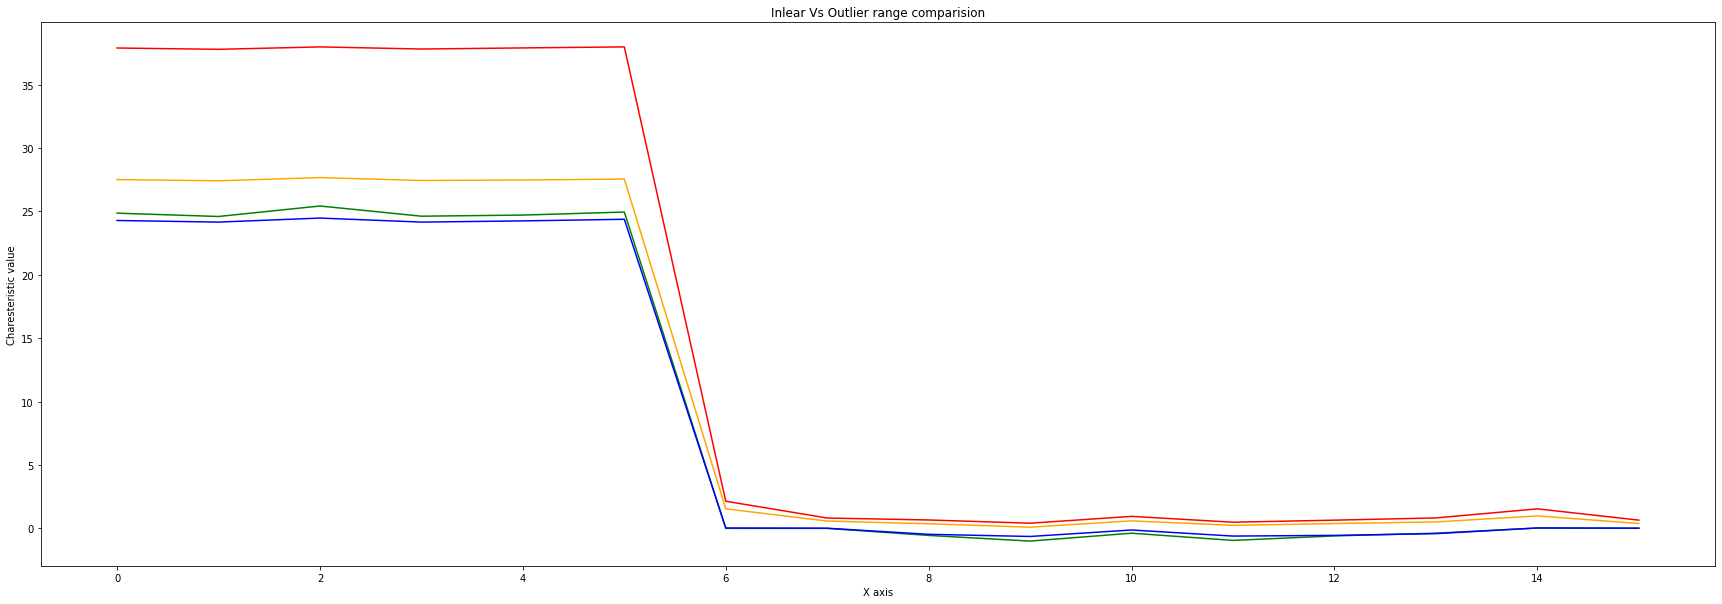

In [23]:
# Inlear data ranges
import numpy as np
import matplotlib.pyplot as plt
# plotting
plt.figure(figsize=(30,10))
plt.title("Inlear Vs Outlier range comparision")
plt.xlabel("X axis")
plt.ylabel("Charesteristic value")
inler = X_Inliear.reshape(931,16)
Inlear_min = np.amin(inler,axis = 0)
plt.plot(Inlear_min, color ="green")
Inlear_max = np.amax(inler,axis = 0)
plt.plot(Inlear_max, color ="red")
print("inlear min values",Inlear_min)
print("inlear max values",Inlear_max)
#Outlier data ranges
outler = X_outlier.reshape(113,16)
Outler_min = np.amin(outler,axis = 0)
plt.plot(Outler_min, color ="blue")
Outler_max = np.amax(outler,axis = 0)
plt.plot(Outler_max, color ="orange")
print("Outlier min values",Outler_min)
print("Outlier max values",Outler_max)
# importing the library
plt.show()


**We can see that outlier range is falling in between Inliear range, so diffrentiation through machine learning is not possible. This also shows that data enrichment technique used in this dataset is not suitable. So we need to check the variation on raw data for prediction**